## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [4]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "phase_filtered"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


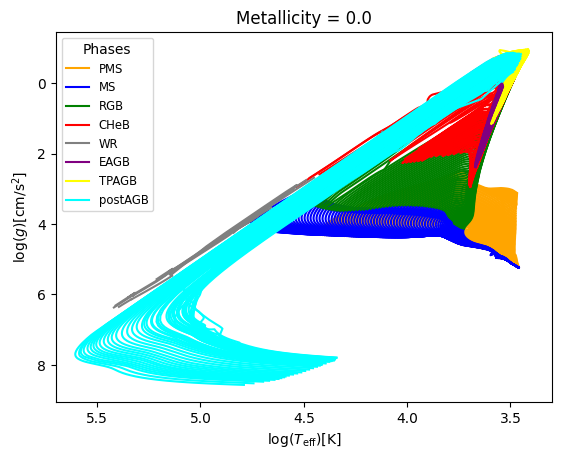

In [5]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [6]:
print_uniques("phase", iso_df)
print_uniques_count("phase", iso_df)

phase : [-1.  0.  2.  3.  4.  5.  6.  9.]
phase : 
	-1.0 => 113220
	0.0 => 339616
	2.0 => 169406
	3.0 => 121583
	9.0 => 7153
	4.0 => 103203
	5.0 => 406936
	6.0 => 206005


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


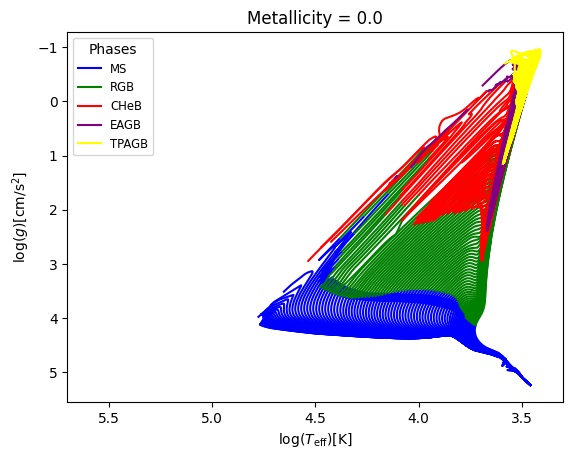

In [7]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [8]:
print_uniques("phase", phase_filtered_iso_df)
print_uniques_count("phase", phase_filtered_iso_df)

phase : [0. 2. 3. 4. 5.]
phase : 
	0.0 => 339616
	2.0 => 169406
	3.0 => 121583
	4.0 => 103203
	5.0 => 406936


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
630600,10.3,3.602322,1.827453,3.0,0.50,0.866616,1.274247
630601,10.3,3.600999,1.809405,3.0,0.50,0.866614,1.283270
630602,10.3,3.599710,1.791489,3.0,0.50,0.866612,1.292228
630603,10.3,3.598418,1.773621,3.0,0.50,0.866610,1.301161


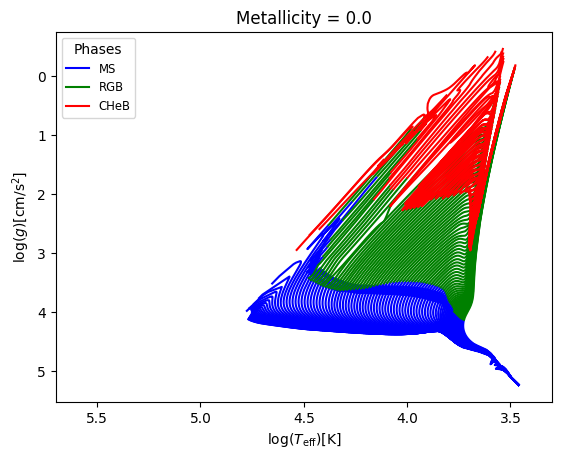

In [9]:
more_phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3]})
display(more_phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(more_phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [10]:
print_all_uniques(more_phase_filtered_iso_df)

log10_isochrone_age_yr  : Range : 5.0 - 10.3, Mean : 8.1154, Median : 8.15

log_Teff  : Range : 3.34 - 5.3788, Mean : 4.0283, Median : 3.9761

log_g  : Range : -1.08 - 6.2594, Mean : 3.5075, Median : 3.8521

Values in phase column : 0.0, 2.0, 3.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.1 - 298.5448, Mean : 11.4145, Median : 2.8996

log_R  : Range : -1.0 - 3.1298, Mean : 0.735, Median : 0.7005



In [11]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(more_phase_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 298.5447575808816
Median value in train data for the mass parameter: 2.900660435695107
Mean value in train data for the mass parameter: 11.448959764246645
Range in train data for the radius parameter : -0.9974628481553472 - 3.129269620812593
Median value in train data for the radius parameter: 0.7005259212303901
Mean value in train data for the radius parameter: 0.7346615625058007

Testing set statistics:
Range in test data for the mass parameter : 0.0999984244466985 - 295.93050489035244
Median value in test data for the mass parameter: 2.89581954298918
Mean value in test data for the mass parameter: 11.31127918999169
Range in test data for the radius parameter : -0.9974747647513328 - 3.1297545143214007
Median value in test data for the radius parameter: 0.700308157259431
Mean value in test data for the radius parameter: 0.7362027655401773

(472953, 4) (157652, 4)
(472953, 2) (157652, 2)


## Model training

### Linear regression

In [10]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.3042271481418729
RMSE :  22.279505512776158
MAE :  11.345261481543792
MedAE :  8.15379784782397
CORR :  0.5515679007842895
MAX_ER :  257.50847847048124
Percentiles : 
  75th percentile :  13.888850611213961
  90th percentile :  17.56944177901141
  95th percentile :  20.95889444292029
  99th percentile :  105.16919905826126



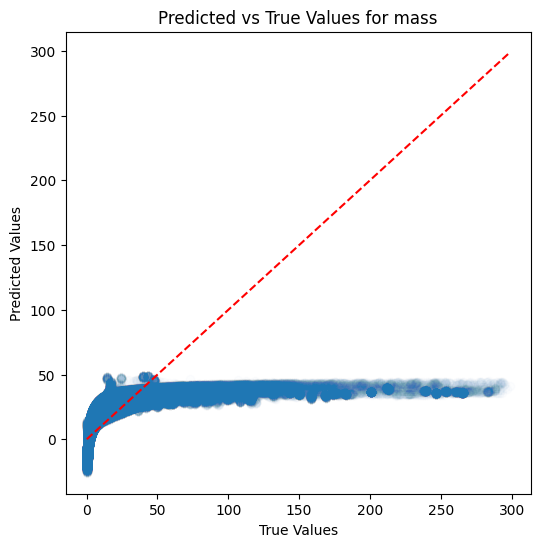

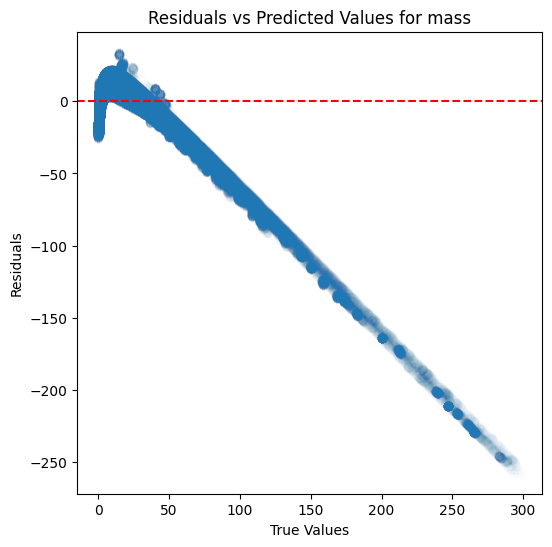

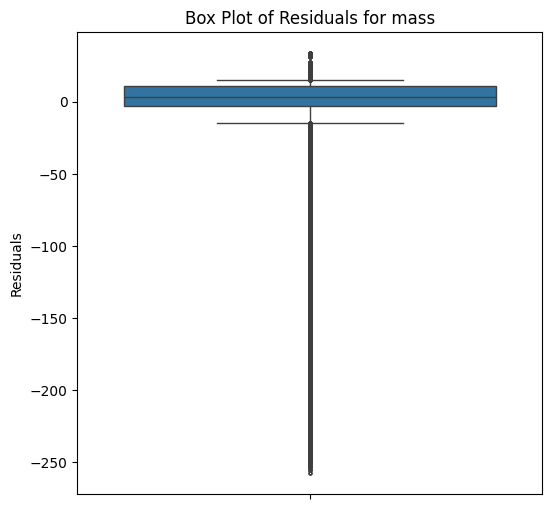

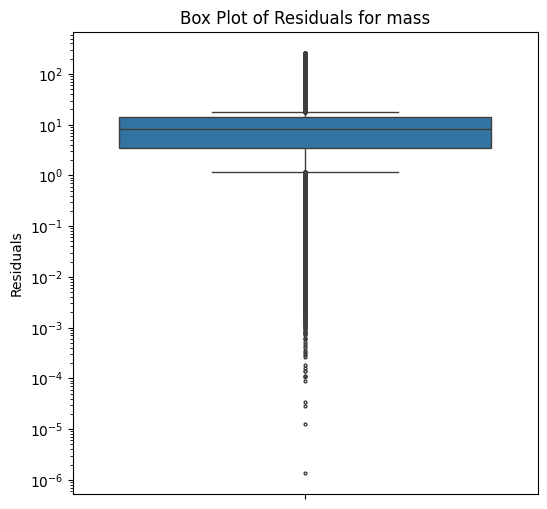

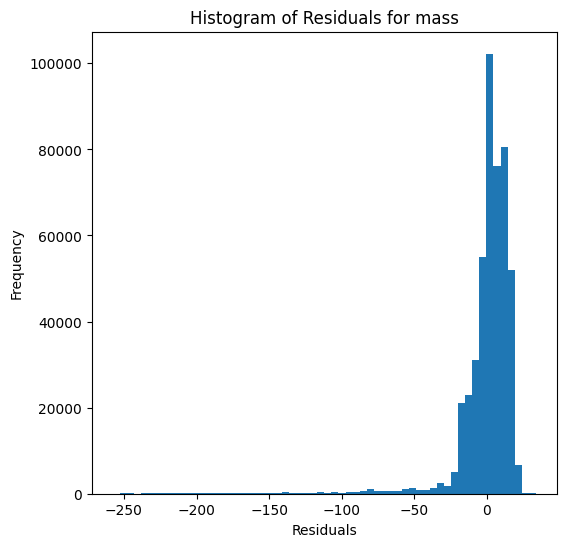

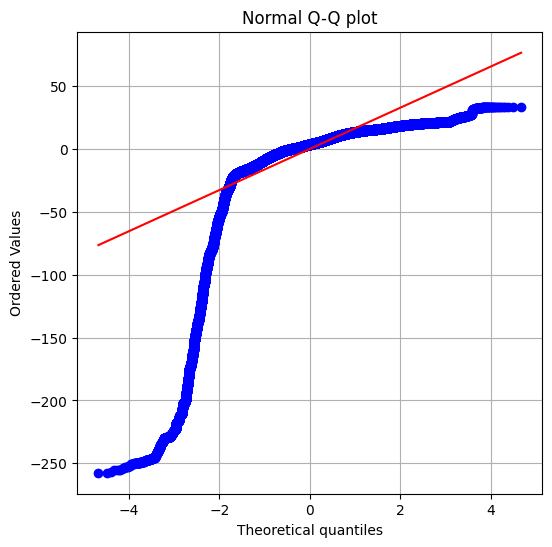


radius results:
RVE :  0.9854956623390955
RMSE :  0.08888463595410556
MAE :  0.0647309751362308
MedAE :  0.045930893159097486
CORR :  0.9927213417365519
MAX_ER :  0.5250932021331782
Percentiles : 
  75th percentile :  0.08958746339238177
  90th percentile :  0.13936621291188683
  95th percentile :  0.17556243964848564
  99th percentile :  0.3004558958982957



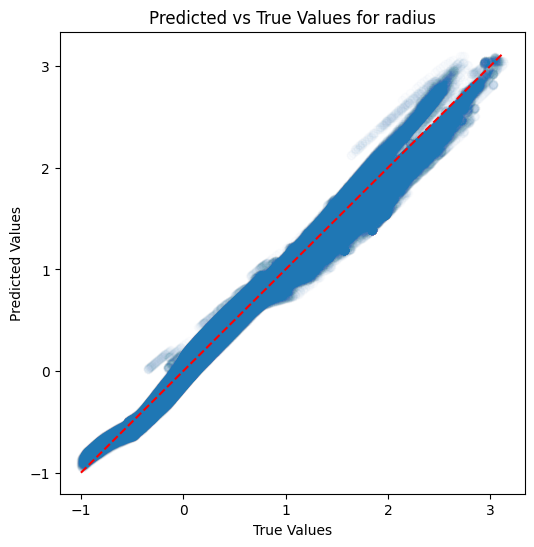

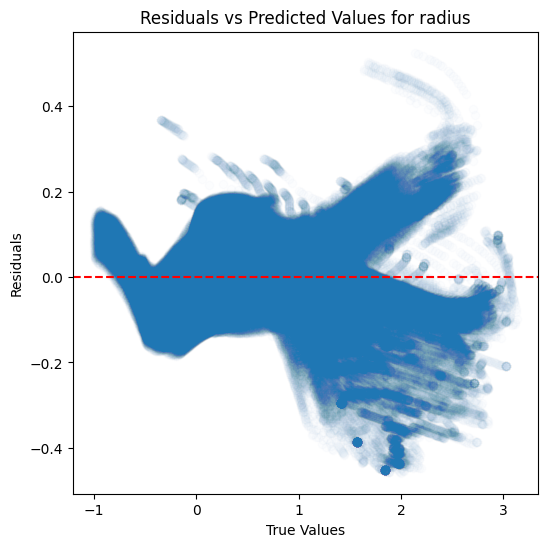

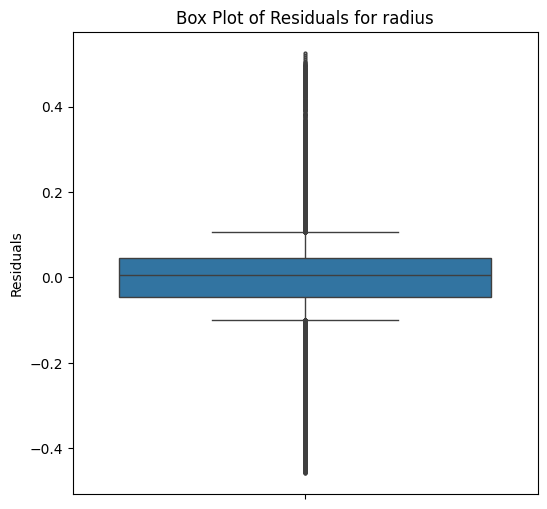

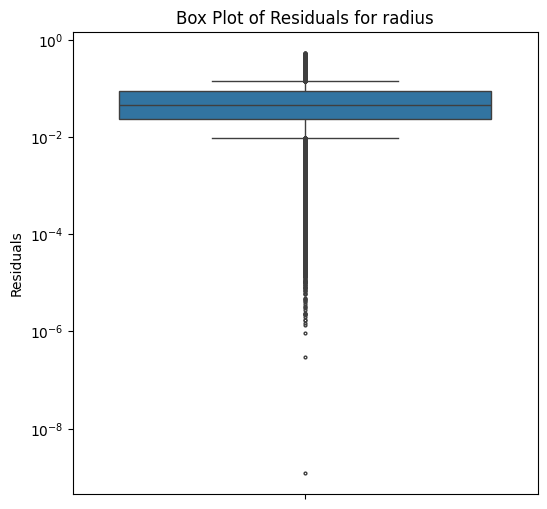

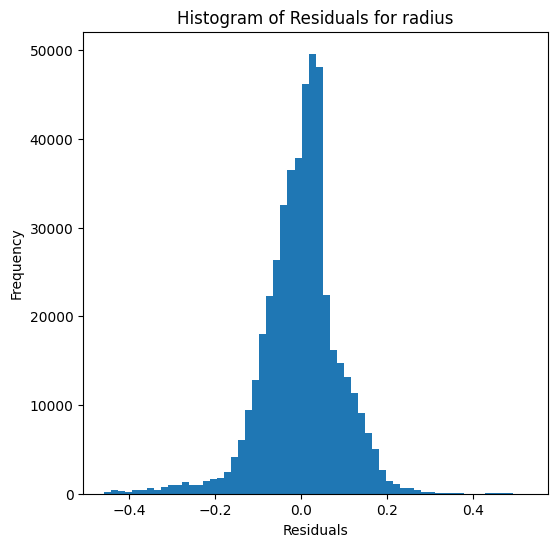

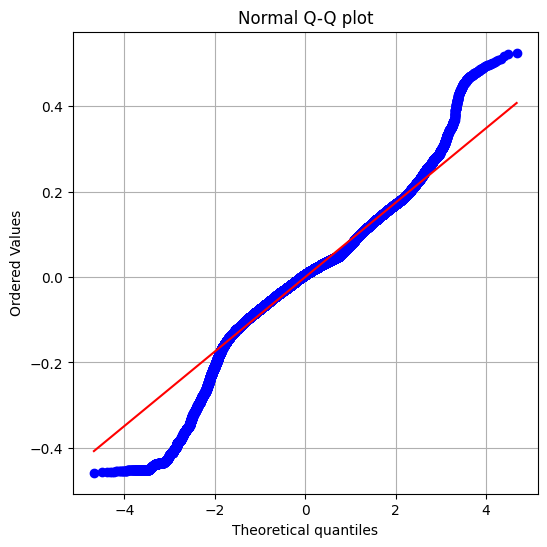

In [11]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [12]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9953844126878636
RMSE :  1.8146183907764735
MAE :  0.19830302802365699
MedAE :  0.003458913865227231
CORR :  0.9976910956127599
MAX_ER :  151.65813444621273
Percentiles : 
  75th percentile :  0.01985757265789445
  90th percentile :  0.10429447732135486
  95th percentile :  0.3537523700180222
  99th percentile :  4.514940449477694



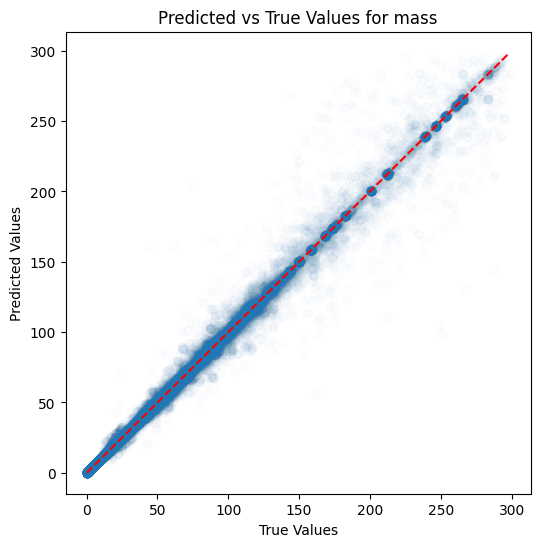

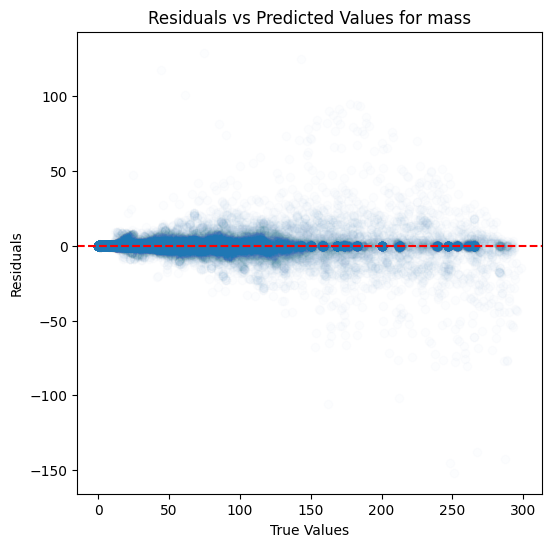

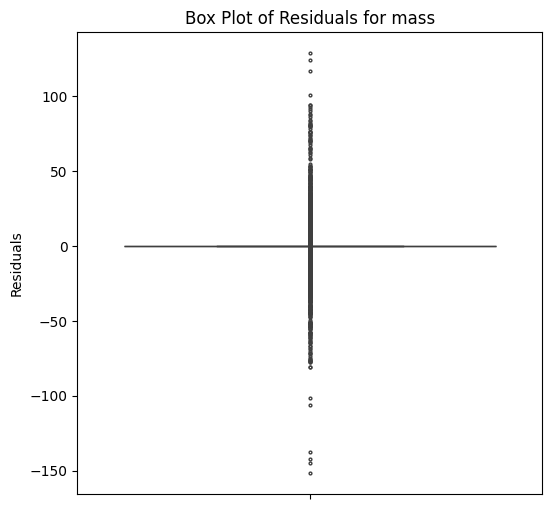

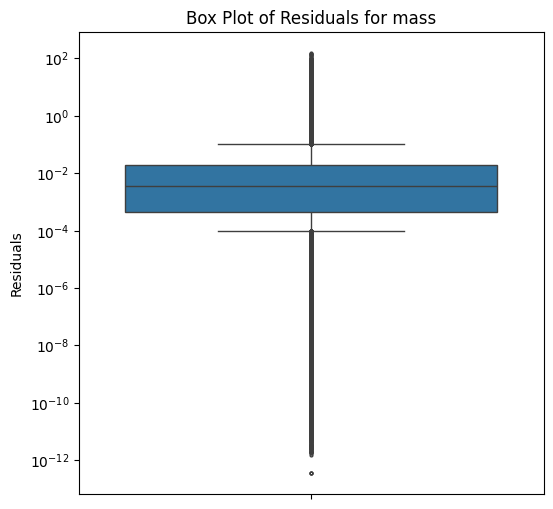

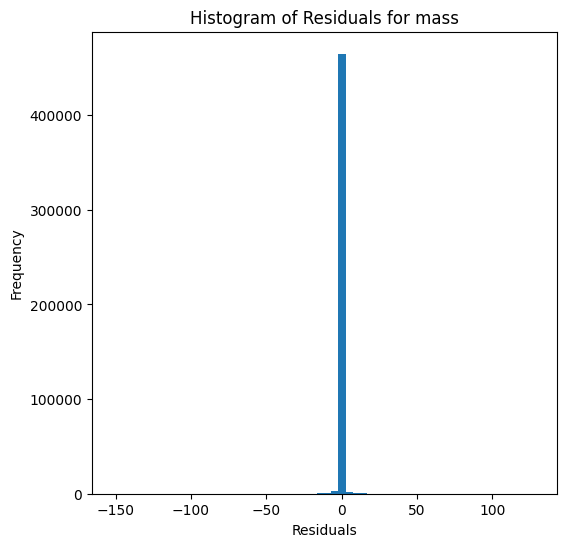

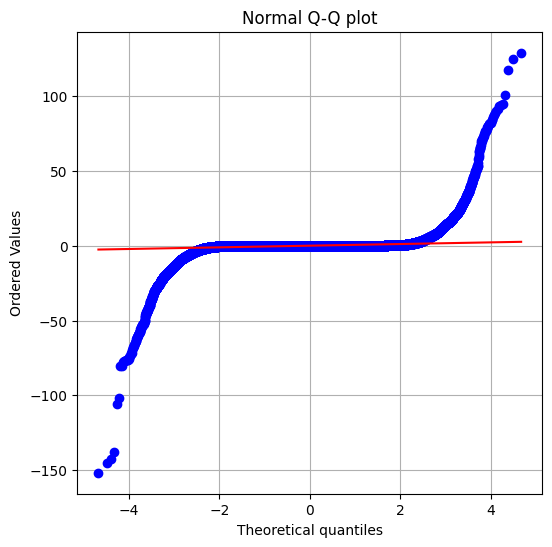


radius results:
RVE :  0.9997977975582353
RMSE :  0.010494919505304725
MAE :  0.005835835695811453
MedAE :  0.003370157353018599
CORR :  0.9998989387826426
MAX_ER :  0.4783497157713891
Percentiles : 
  75th percentile :  0.0072285491842967176
  90th percentile :  0.013008686975445325
  95th percentile :  0.01825577357796406
  99th percentile :  0.04013504133772312



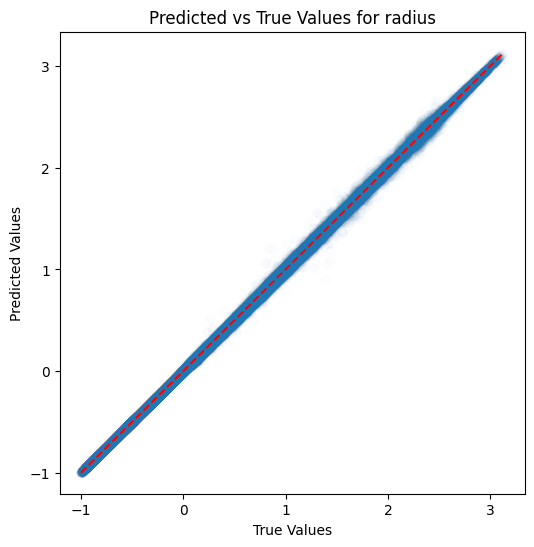

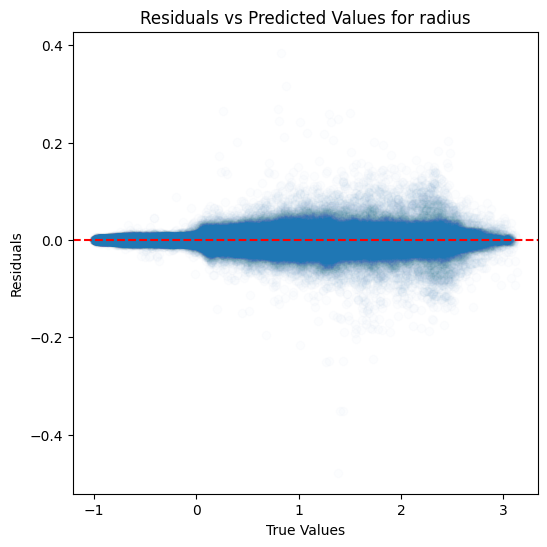

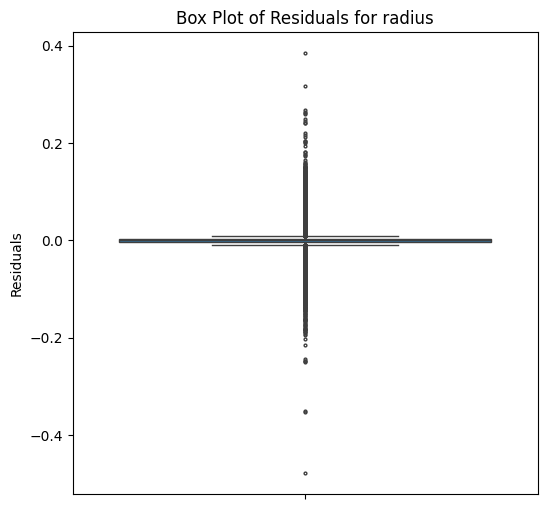

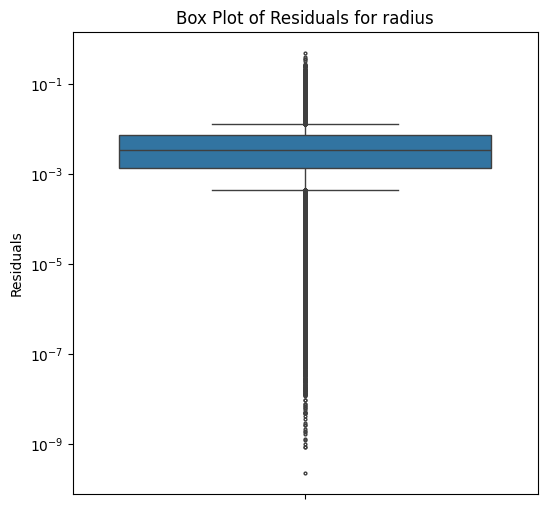

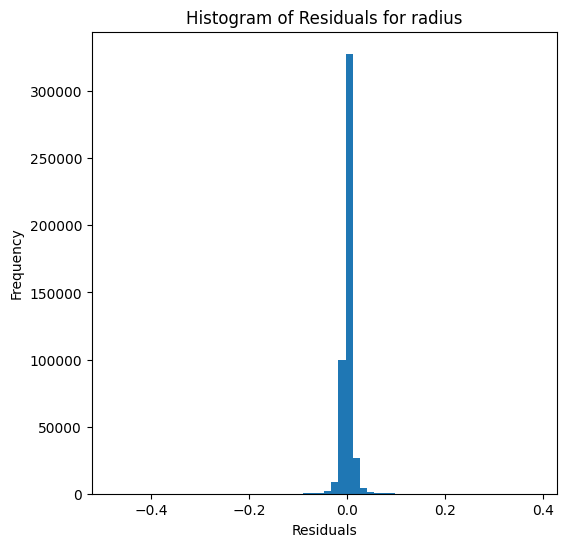

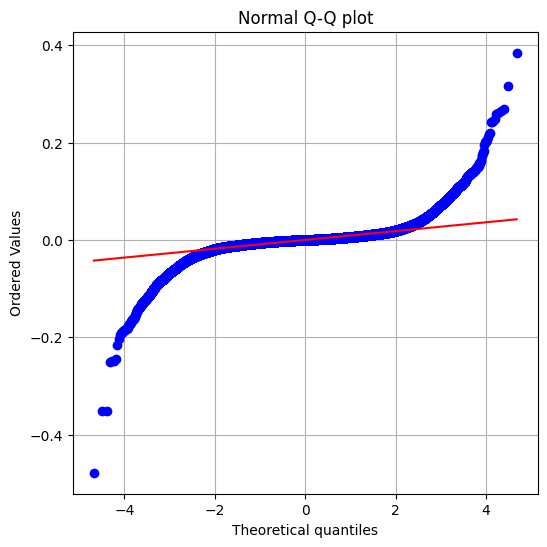

In [13]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [14]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9895916504979603
RMSE :  2.725540200848424
MAE :  0.3284718050123655
MedAE :  0.008160595183567931
CORR :  0.9948902170346177
MAX_ER :  144.21389375194437
Percentiles : 
  75th percentile :  0.04002451942668239
  90th percentile :  0.20998444023819715
  95th percentile :  0.7030173196765063
  99th percentile :  6.870412832709209



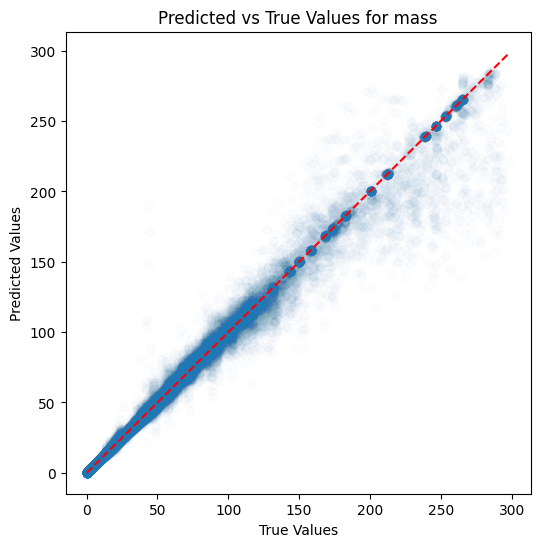

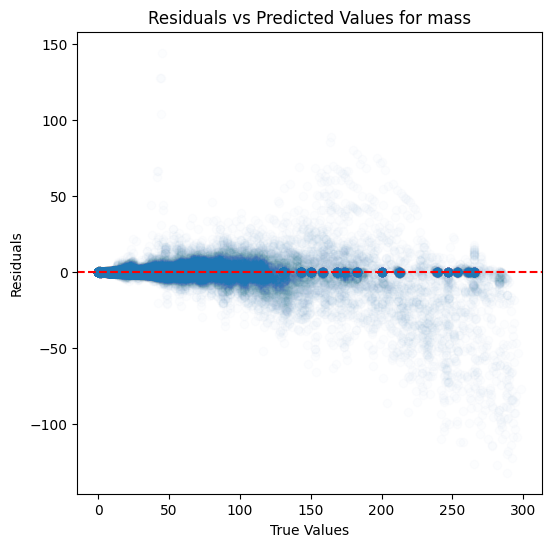

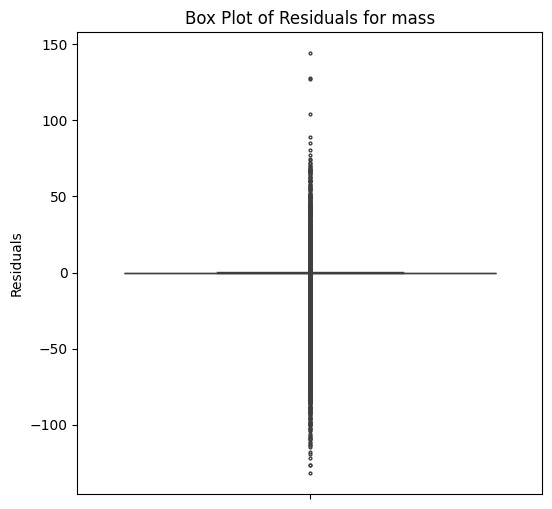

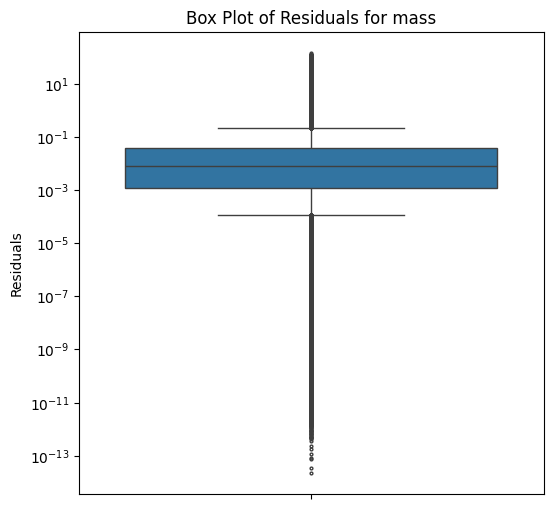

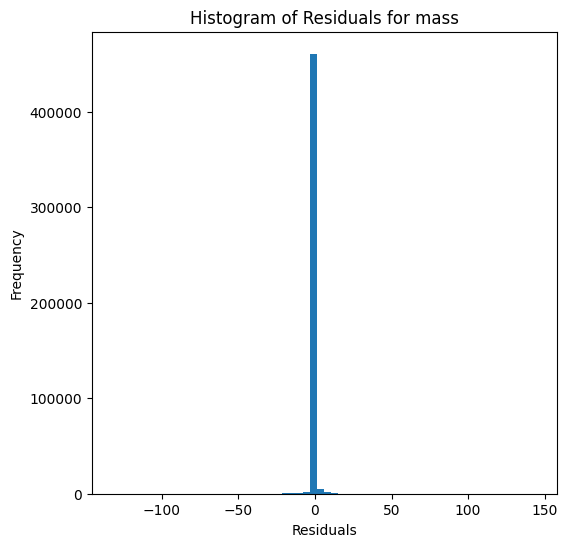

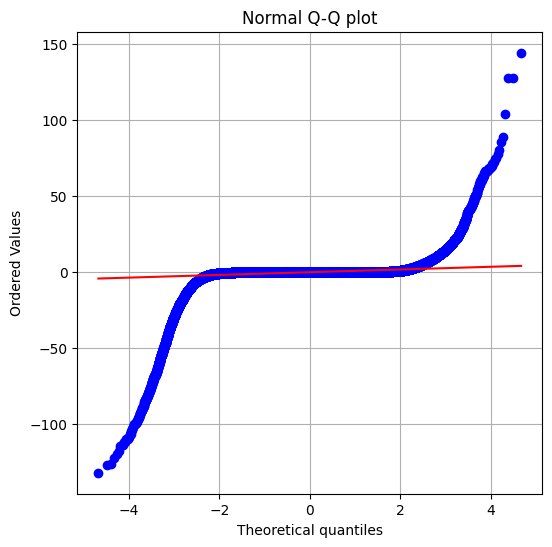


radius results:
RVE :  0.9998970891526346
RMSE :  0.007487659862369321
MAE :  0.004206153743149795
MedAE :  0.0025820541003674924
CORR :  0.9999485752530637
MAX_ER :  0.30723994345065064
Percentiles : 
  75th percentile :  0.005126724308038955
  90th percentile :  0.009207069161919901
  95th percentile :  0.012747870035274689
  99th percentile :  0.02702617756984657



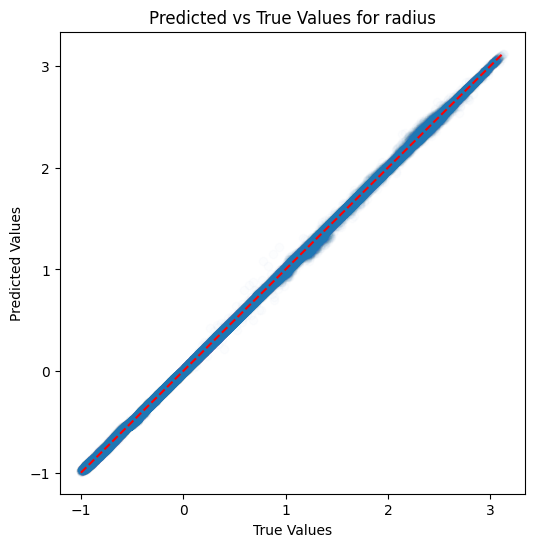

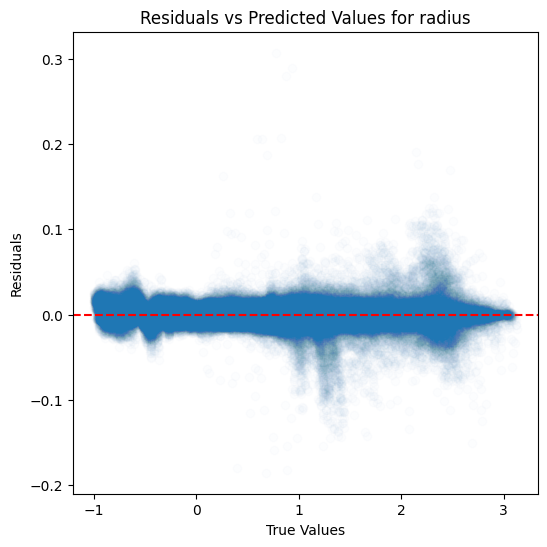

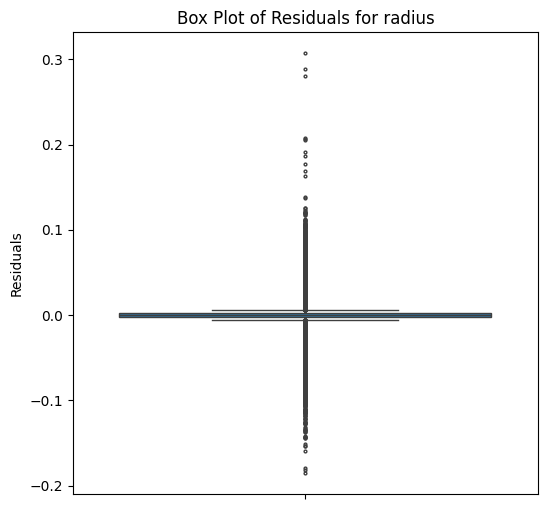

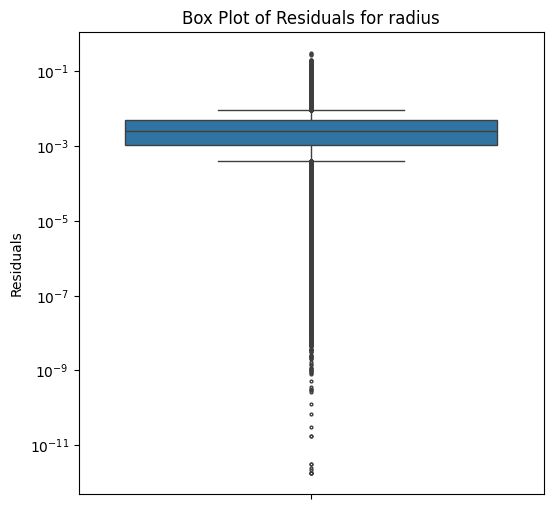

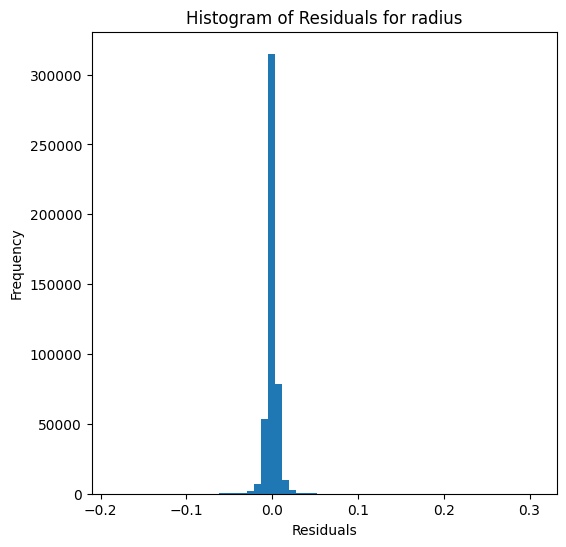

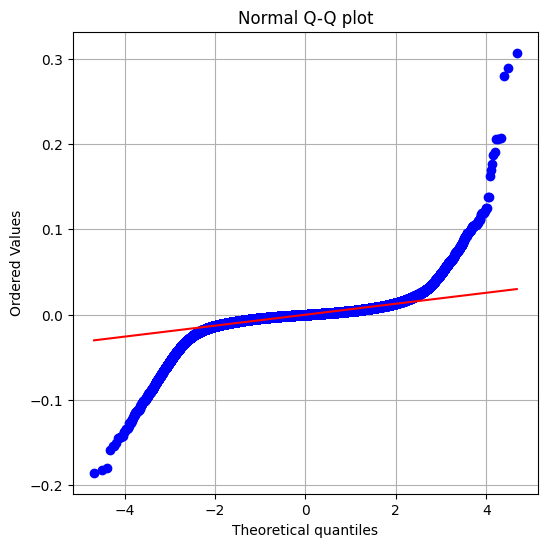

In [15]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [16]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.997803346457879
RMSE :  1.251853674212954
MAE :  0.14514856613293192
MedAE :  0.004126763983665516
CORR :  0.9989022001052598
MAX_ER :  102.86761115945916
Percentiles : 
  75th percentile :  0.01563967997713256
  90th percentile :  0.07904236252495238
  95th percentile :  0.29218803865889365
  99th percentile :  3.227751926182881



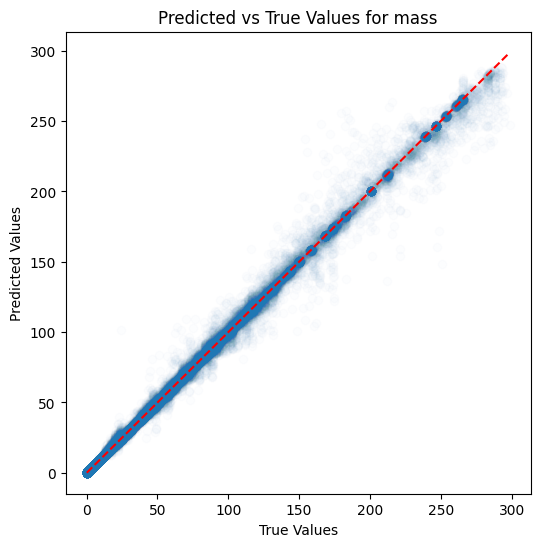

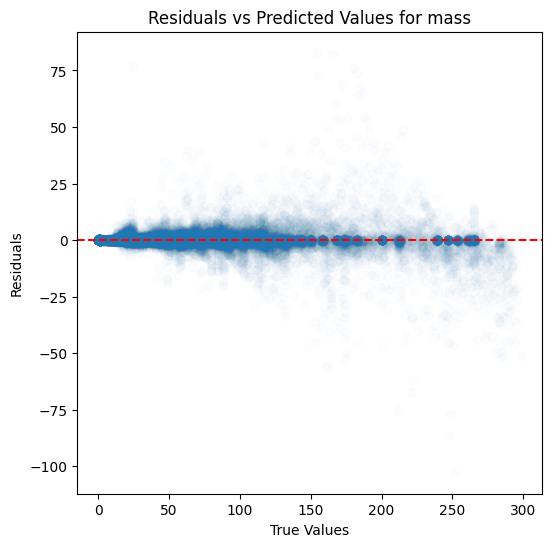

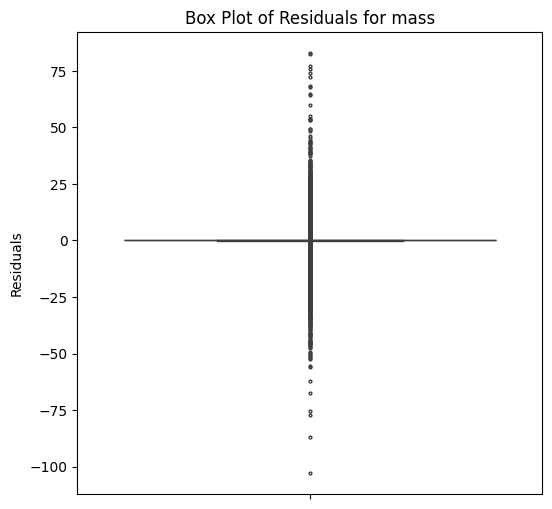

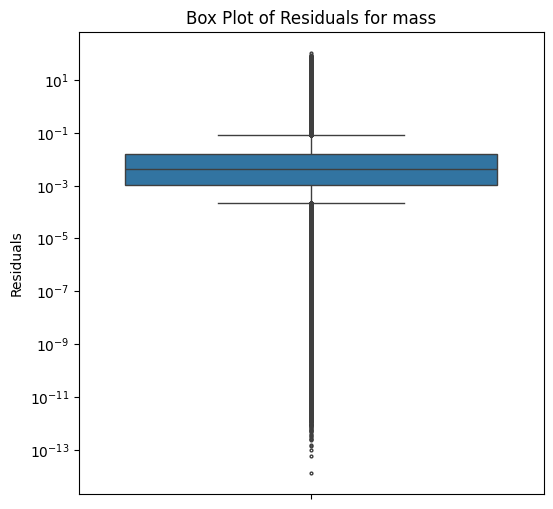

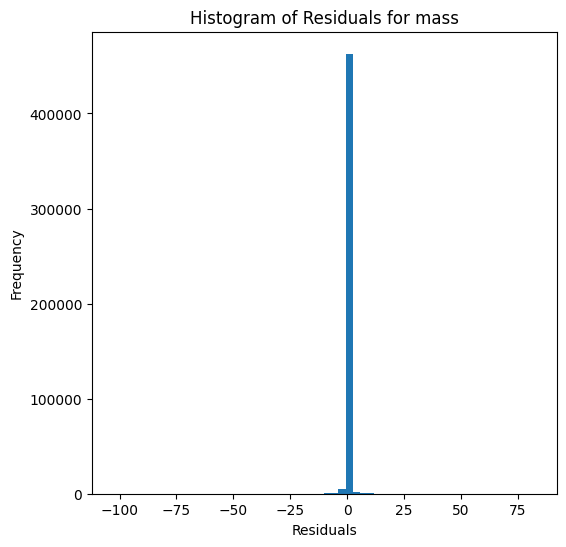

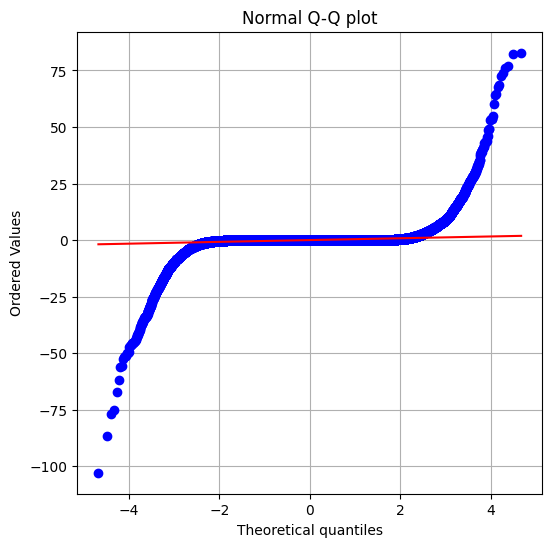


radius results:
RVE :  0.9999433784746684
RMSE :  0.00555376602112932
MAE :  0.002701475014857144
MedAE :  0.0013194013100226165
CORR :  0.9999716890703798
MAX_ER :  0.39198502550669323
Percentiles : 
  75th percentile :  0.0031074373677617007
  90th percentile :  0.006261372026926493
  95th percentile :  0.009341208849054254
  99th percentile :  0.02078423628200856



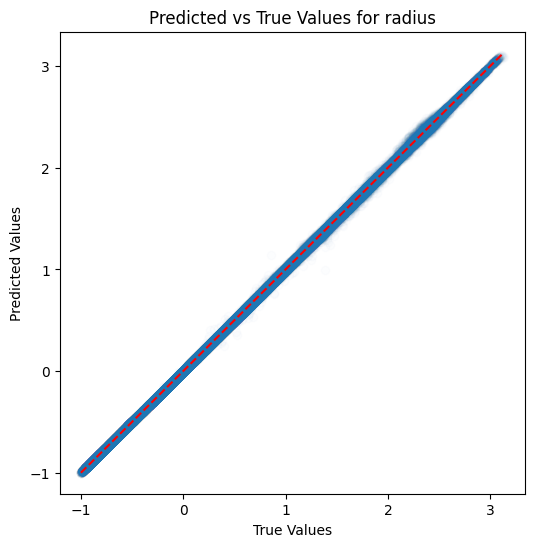

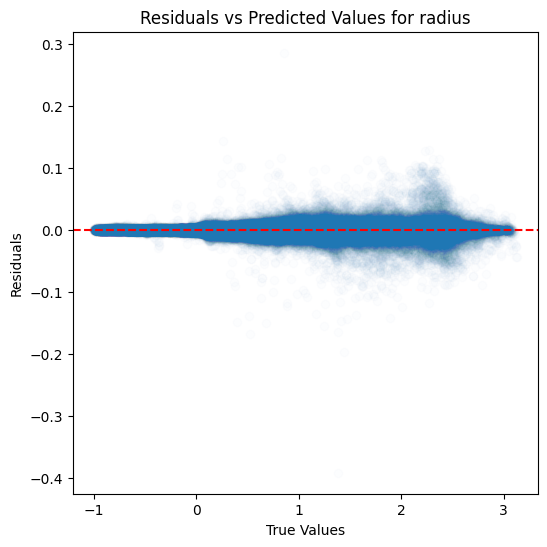

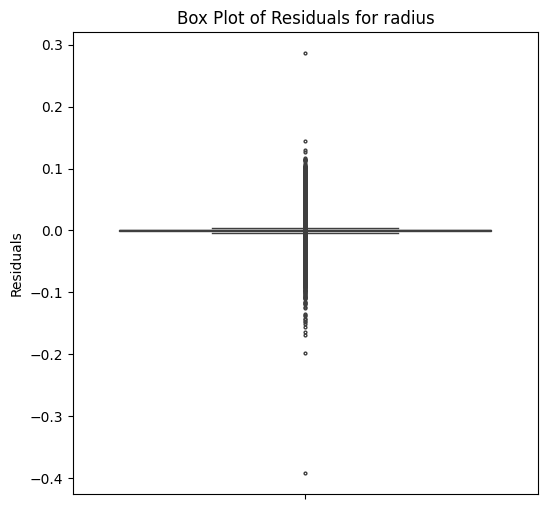

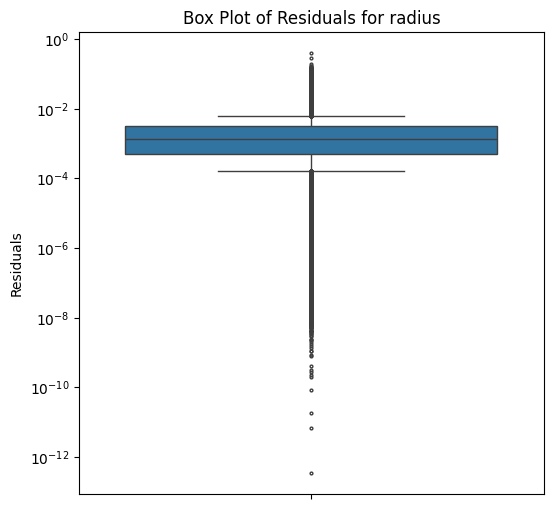

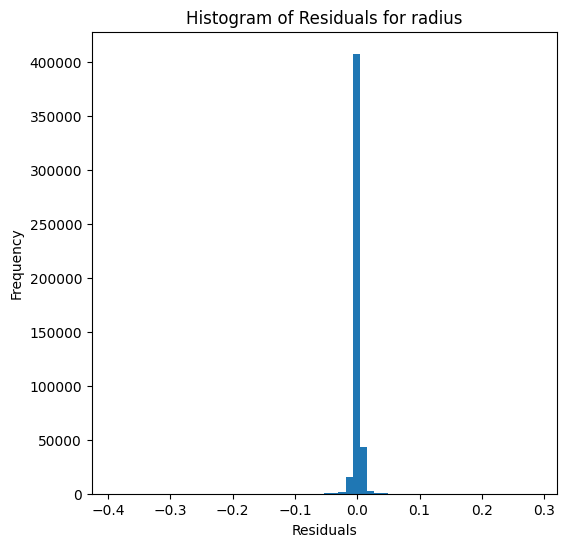

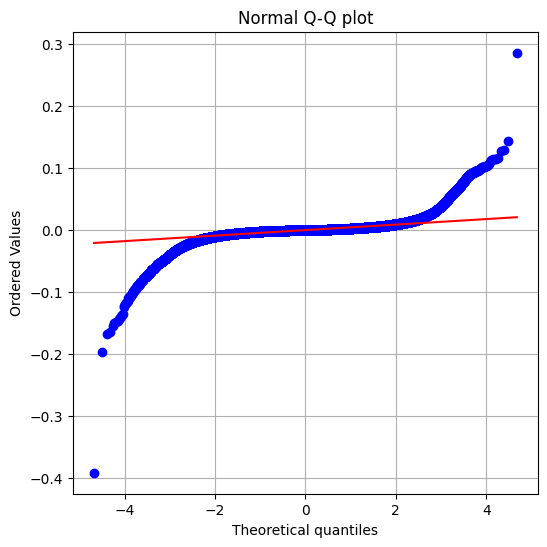

In [17]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [18]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9941191064217958
RMSE :  2.048301547851118
MAE :  0.5307691028961596
MedAE :  0.09905868717464794
CORR :  0.9970552947594146
MAX_ER :  72.95365928611318
Percentiles : 
  75th percentile :  0.2721599568486974
  90th percentile :  0.9840569090648591
  95th percentile :  2.1671027282946103
  99th percentile :  8.487459015326156



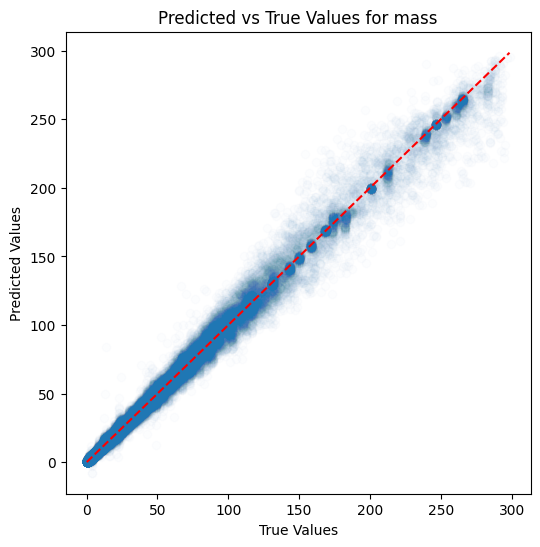

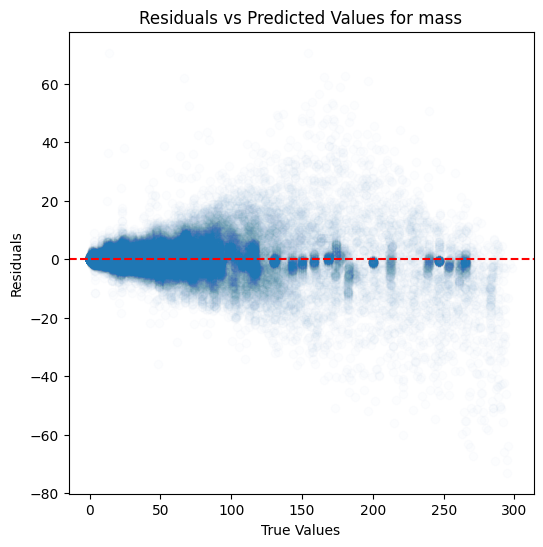

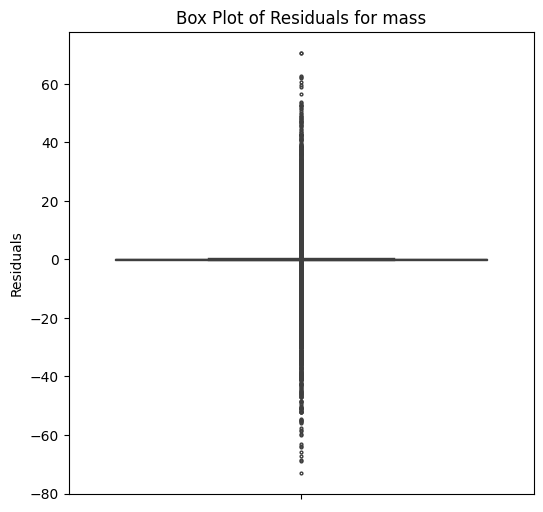

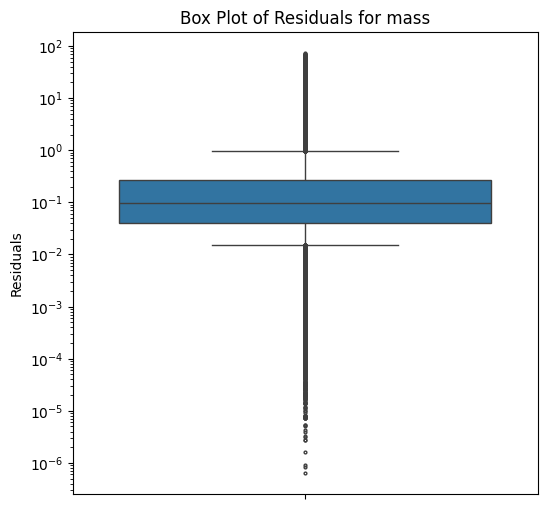

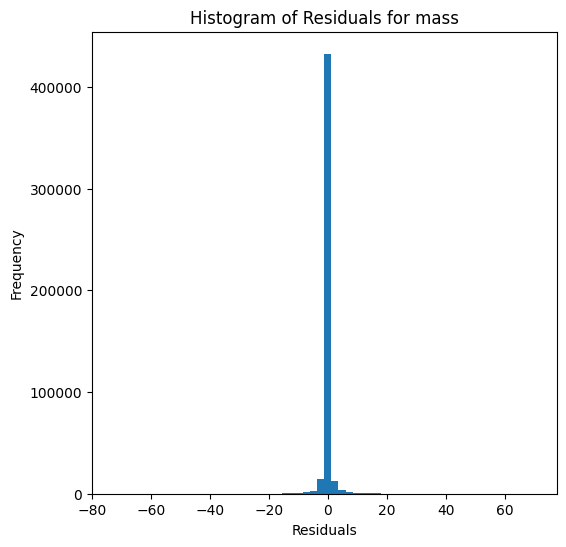

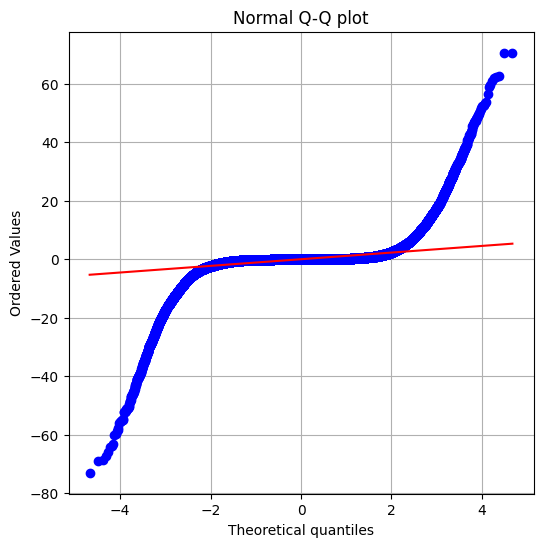


radius results:
RVE :  0.9996020484794627
RMSE :  0.01472288296755733
MAE :  0.010632378823772309
MedAE :  0.008112806358780478
CORR :  0.9998010225765576
MAX_ER :  0.4896907800444315
Percentiles : 
  75th percentile :  0.0145989885171105
  90th percentile :  0.02253357144233852
  95th percentile :  0.028556251605822012
  99th percentile :  0.04453989584065218



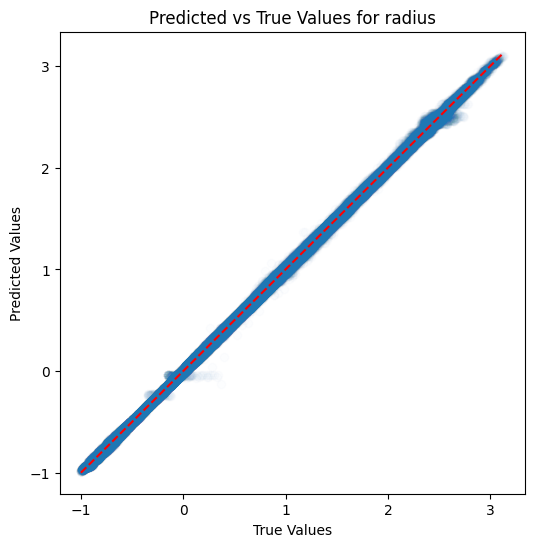

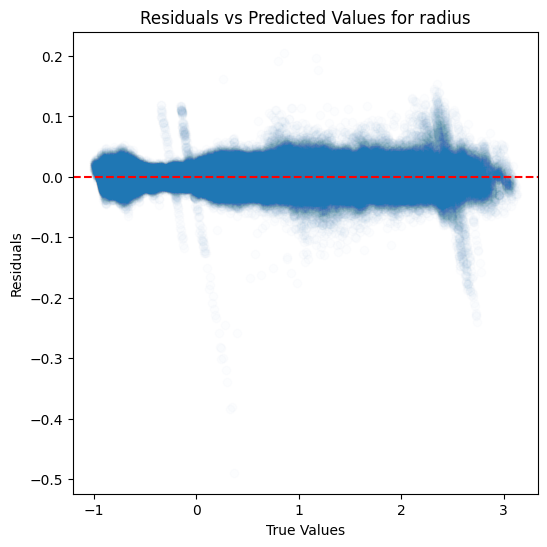

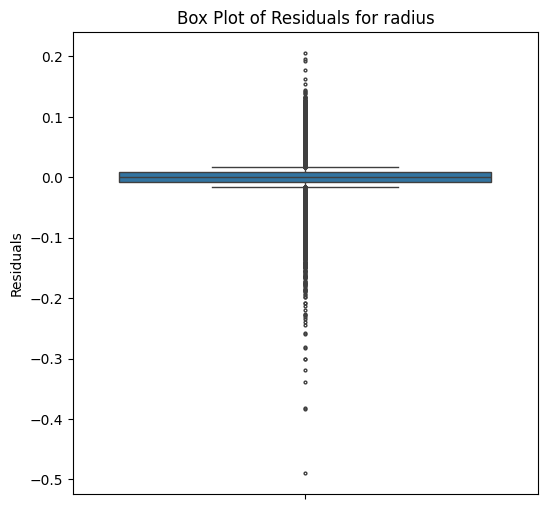

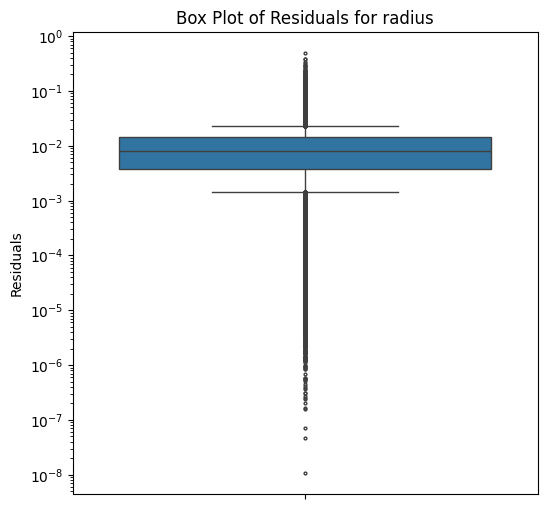

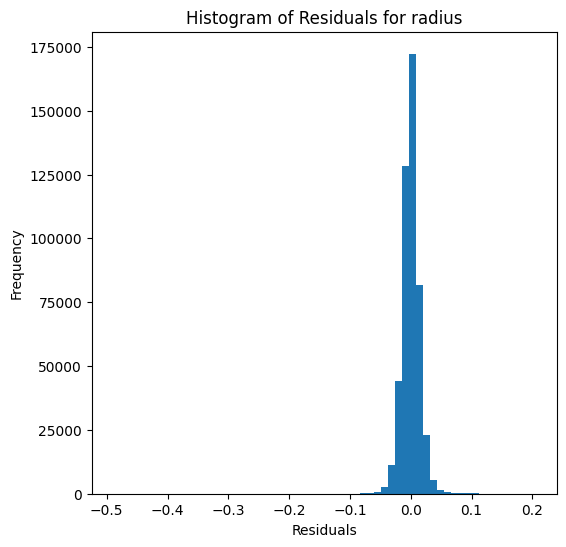

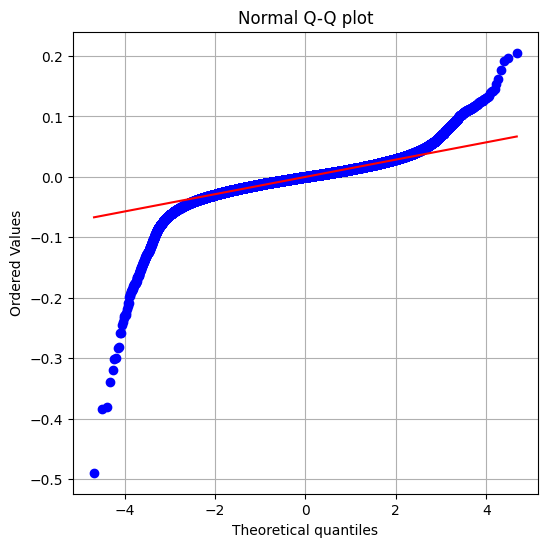

In [20]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [12]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


phase_filtered train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.4520554308570874
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.3478860128505255
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.3941792218348343
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.5748652243173527
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.7559000401809146

mass results:
RVE :  0.9833181115675924
RMSE :  3.44984648969487
MAE :  1.044908169780256
MedAE :  0.2603732013004336
CORR :  0.9916370488806937
MAX_ER :  164.20912271819202
Percentiles : 
  75th percentile :  0.5874311067330071
  90th percentile :  1.9021934114700825
  95th percentile :  4.710757382037276
  99th percentile :  15.644332953304694



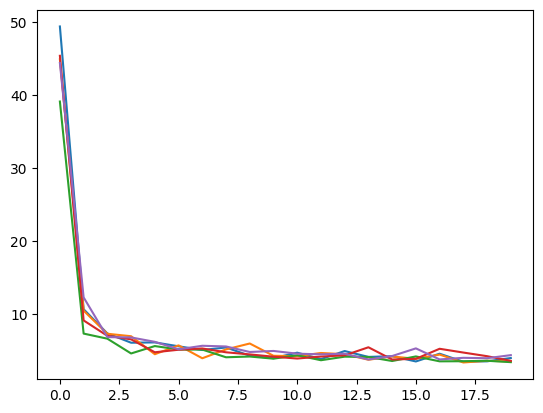

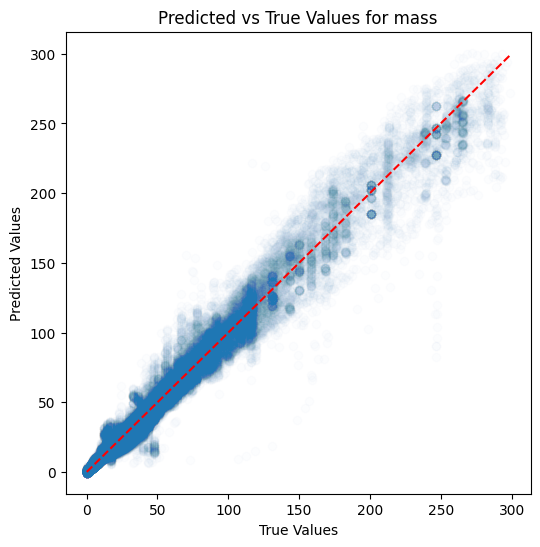

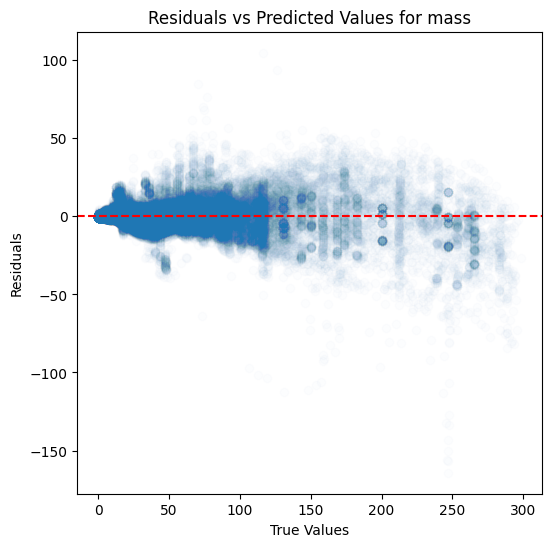

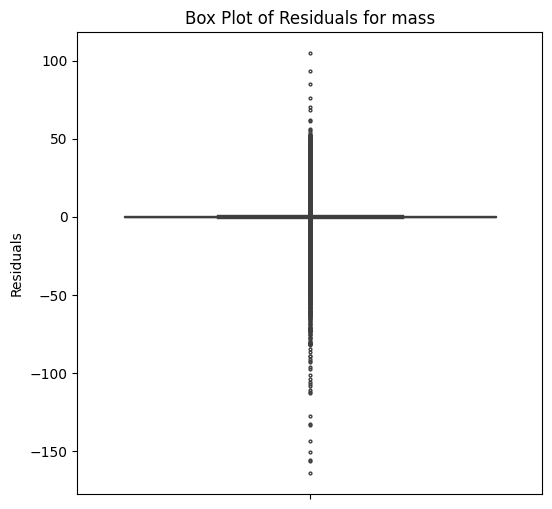

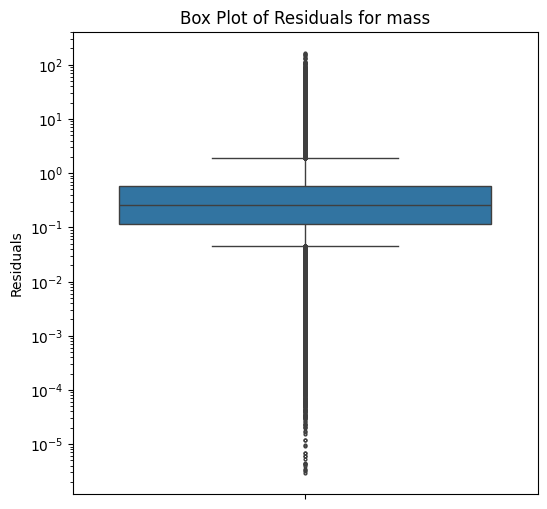

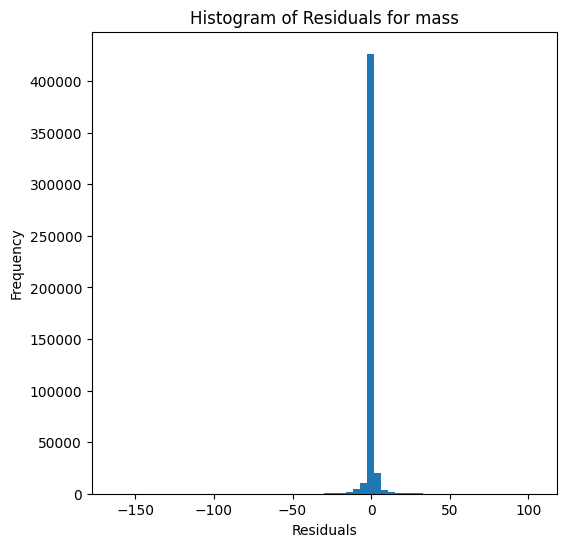

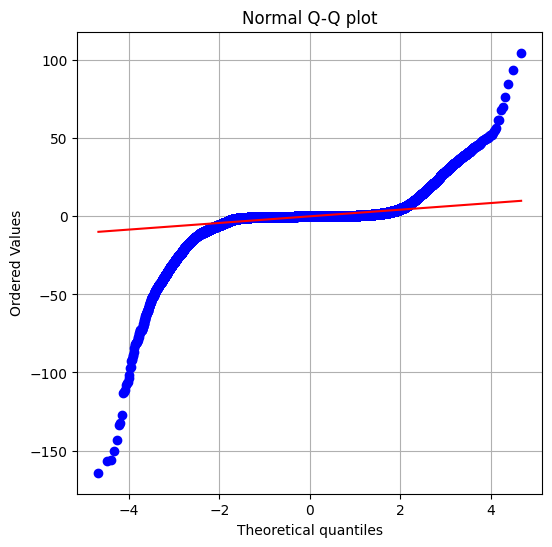


radius results:
RVE :  0.9895588708424492
RMSE :  0.07677636918401219
MAE :  0.05601318850310208
MedAE :  0.04222052331270566
CORR :  0.9947657898755842
MAX_ER :  0.749444959162904
Percentiles : 
  75th percentile :  0.07548088848322843
  90th percentile :  0.11809718923084093
  95th percentile :  0.1561041903381267
  99th percentile :  0.24921627577894326



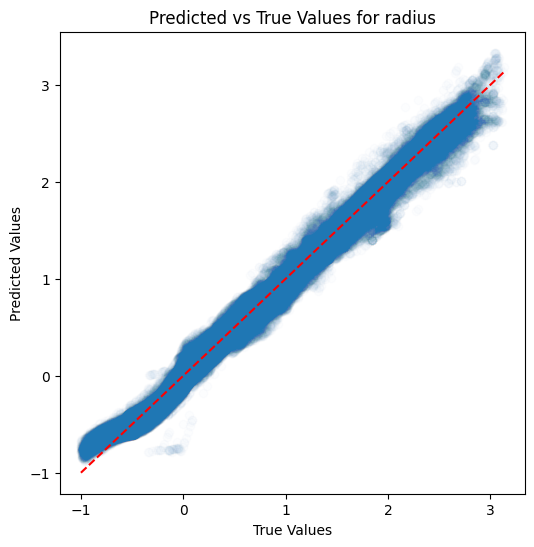

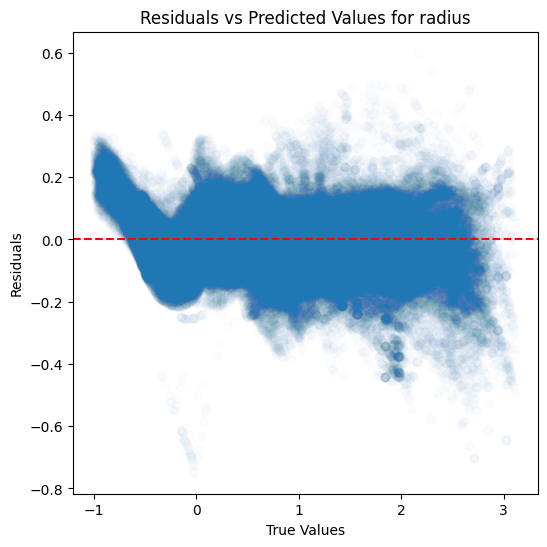

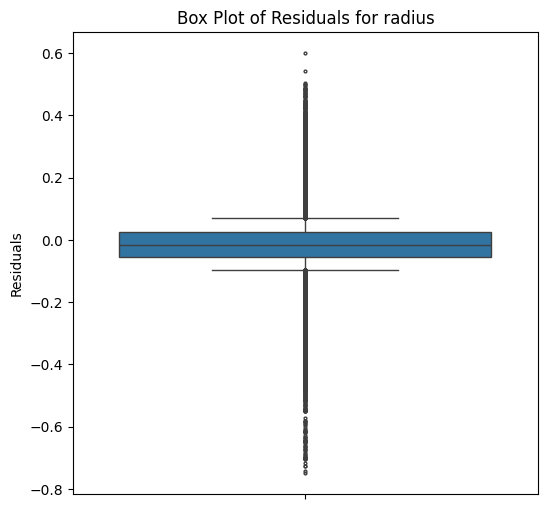

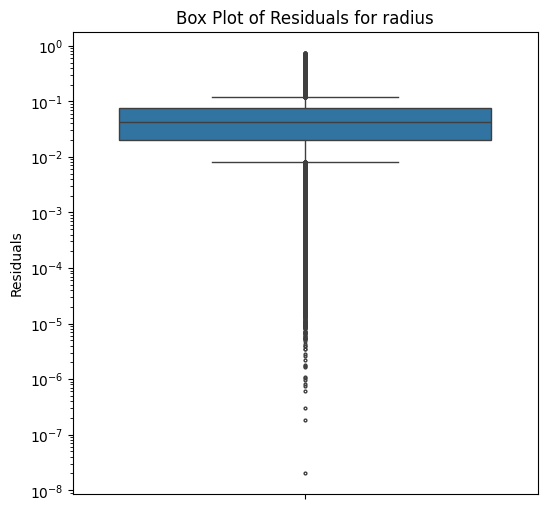

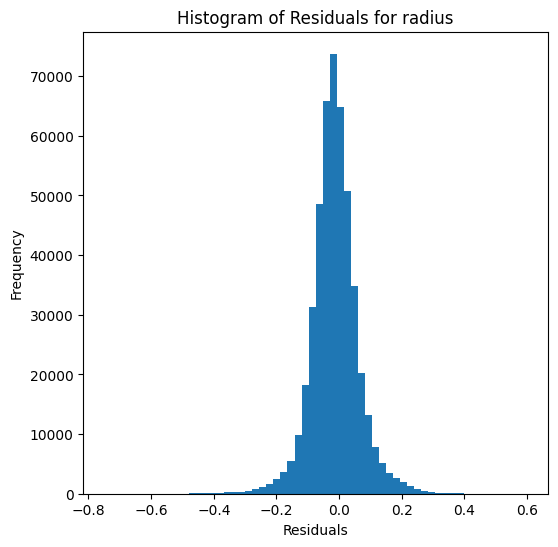

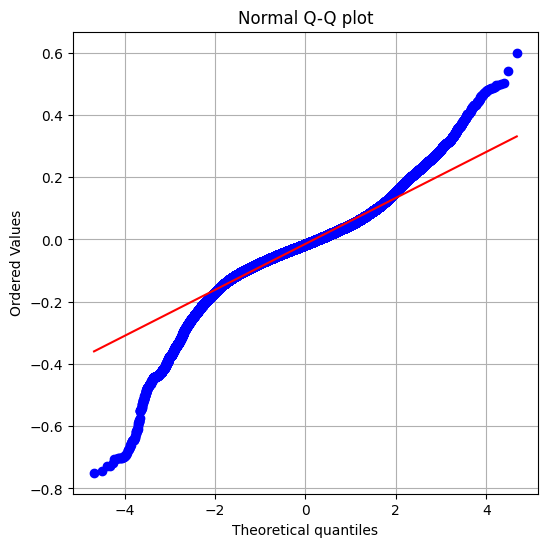

In [13]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)